# Beszámoló
## Rácz Péter

In [18]:
# import pandas numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read d_long.tsv as d_long
d_long = pd.read_csv('d_long.tsv', sep='\t')
# same w/ wide
d_wide = pd.read_csv('d_wide.tsv', sep='\t')

## Alapkérdés

Arra voltam kíváncsi, hogy az élelemszerzés típusa meghatározza-e azt, hogy létezik-e pénz meg gazdaság egy adott gyűjtögető közösségben.

A kérdést a Binford Hunter-Gatherer adatbázisban vizsgáltam meg. Csak az Ausztráliai közösségeket néztem meg, mert csak.

## Vizsgált változók

Az élelmiszerszerzés típusát három változón keresztül vizsgáltam. Ezek:

In [19]:
# take d_long, filter for title contains "Subsistence", select distinct values of var_id,category,title,definition
d_long[d_long['title'].str.contains('Subsistence')][['var_id', 'category', 'title', 'definition']].drop_duplicates()

,var_id,category,title,definition
0,B001,"Subsistence, Economy, Property",Subsistence economy: Gathering,Group's dependence upon gathering of terrestri...
56,B002,"Subsistence, Economy, Property",Subsistence economy: Hunting,Group's dependence upon hunting of terrestrial...
112,B003,"Subsistence, Economy, Property",Subsistence economy: Fishing,Group's dependence upon fishing of aquatic org...



Mind a három számváltozó, azt mondják meg, hogy nulla és száz között mennyire fontos egy adott csoportnak az adott élelemforrás. Erről csinálok három histogrammot.

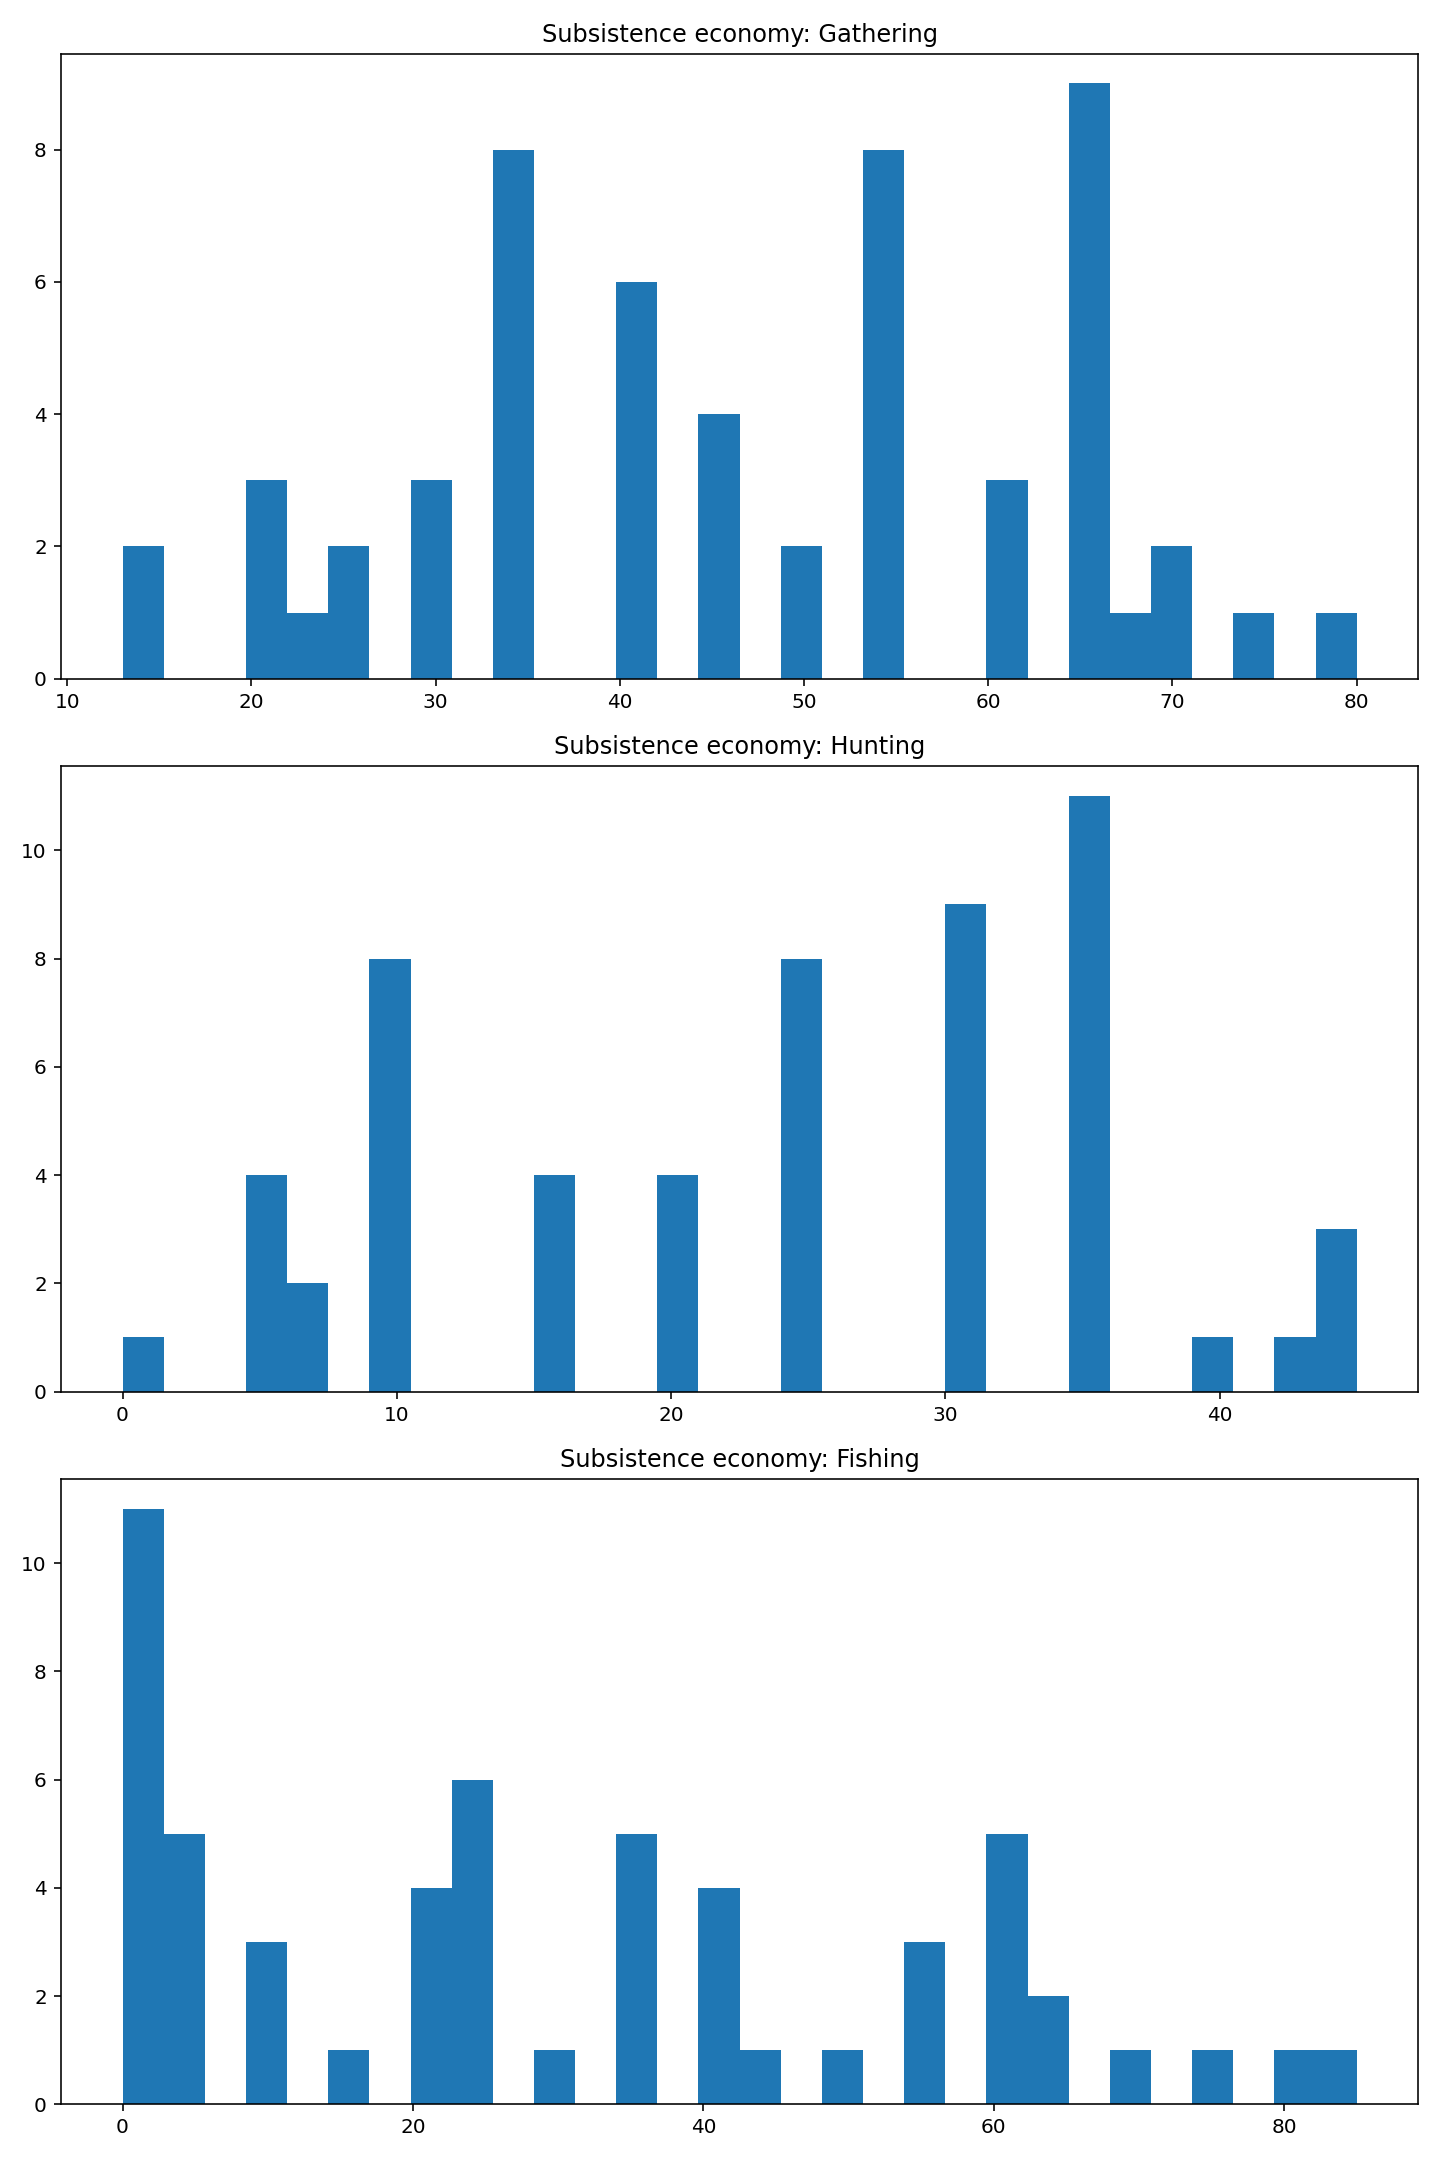

In [20]:
# take d_long, filter for title contains "Subsistence", for each value of title, make histogram of code in separate panels for each title
# Filter the DataFrame
d_long_sub = d_long[d_long['title'].str.contains('Subsistence')]

# Get unique titles
titles = d_long_sub['title'].unique()

# Create a figure and axes
fig, axs = plt.subplots(len(titles), 1, figsize=(10, 5*len(titles)))

# For each title, create a histogram
for ax, title in zip(axs, titles):
    ax.hist(d_long_sub[d_long_sub['title'] == title]['code'], bins=30)
    ax.set_title(title)

# Improve layout
plt.tight_layout()
plt.show()


Hogyan függenek össze? Ahhoz, hogy erre a kérdésre válaszoljak, a három számoszlopot egymás mellé teszem (eddig egymás alatt voltak).

/Users/pracz/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


<Axes: xlabel='Subsistence economy: Hunting', ylabel='Subsistence economy: Gathering'>

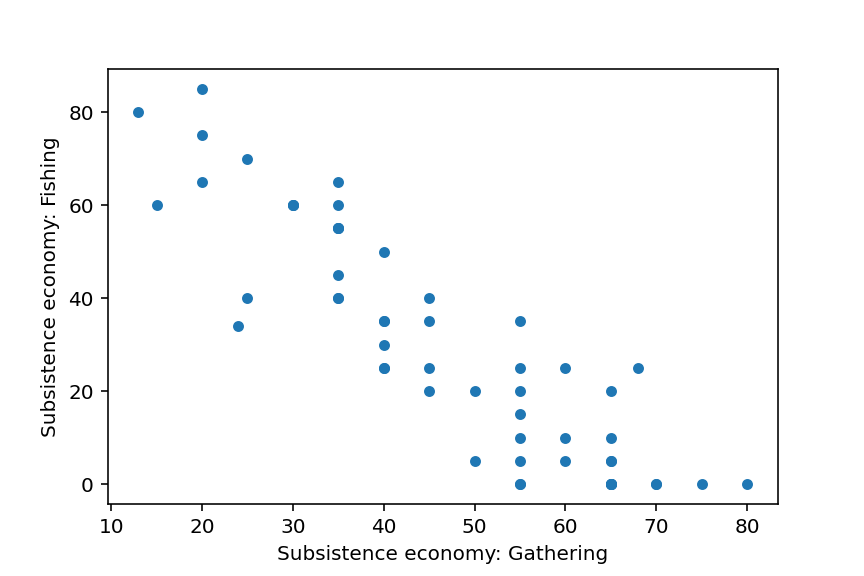

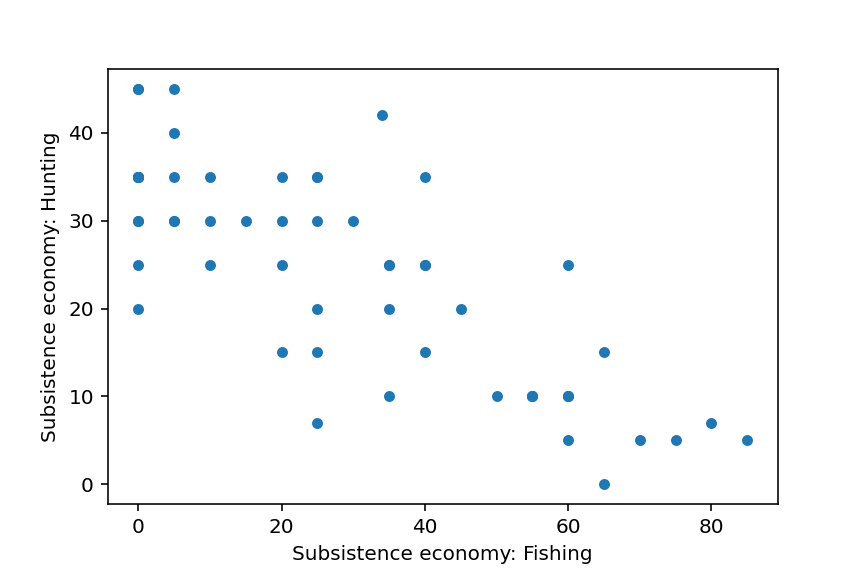

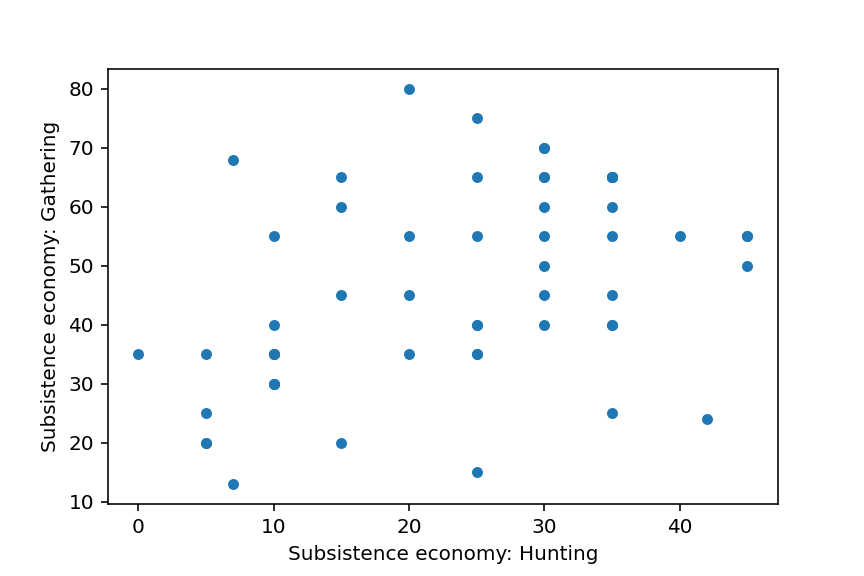

In [21]:
# matplotlib plot with linear smooth
d_wide.plot.scatter(x='Subsistence economy: Gathering', y='Subsistence economy: Fishing')

d_wide.plot.scatter(x='Subsistence economy: Fishing', y='Subsistence economy: Hunting')

d_wide.plot.scatter(x='Subsistence economy: Hunting', y='Subsistence economy: Gathering')



Az első ábrán azt látjuk, hogy a halászat és a gyűjtögetés nagyon összefügg. Ha egy közösség sokat halászik, akkor keveset gyűjtöget, és fordítva. Ehhez képest a második ábrán azt látjuk, hogy a vadászat és a halászat viszonya már jóval zajosabb. A harmadik ábrán pedig azt, hogy ha egy közösség sokat vadászik, akkor sokat is gyűjtöget, de ez a legkevésbé erős összefüggés.

A gazdasági rendszer típusát két változón keresztül vizsgáltam. Ezek:

In [22]:
d_long[d_long['title'].str.contains('money|locations')][['var_id', 'category', 'title', 'definition']].drop_duplicates()

,var_id,category,title,definition
168,B033,"Economy, Property, Wealth transactions",Use of money,Presence or absence of use of money within the...
224,B037,"Subsistence, Economy, Property",Ownership of resource locations,Ownership of resource locations


Itt is megnézem, hogyan néznek ki ezek a változók.


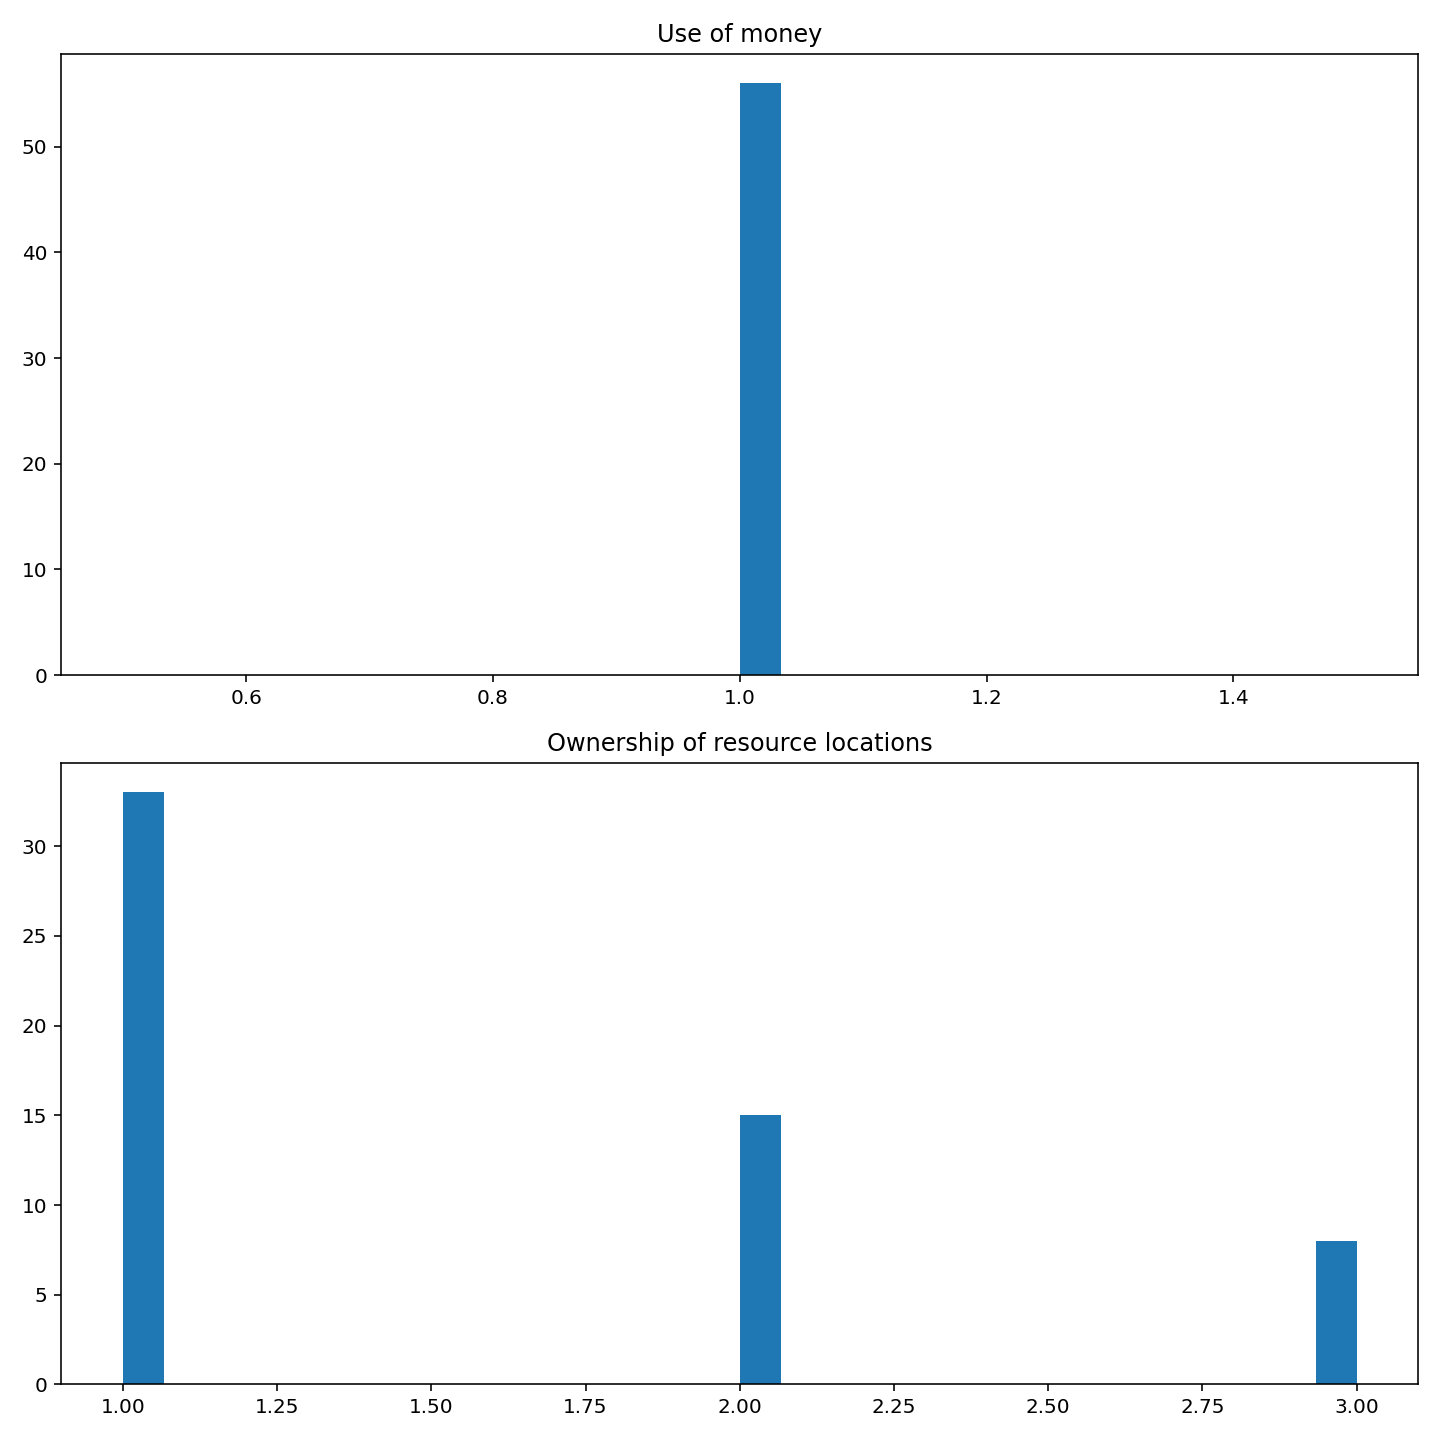

In [23]:
d_long_sub = d_long[d_long['title'].str.contains('money|locations')]
titles = d_long_sub['title'].unique()
fig, axs = plt.subplots(len(titles), 1, figsize=(10, 5*len(titles)))
for ax, title in zip(axs, titles):
    ax.hist(d_long_sub[d_long_sub['title'] == title]['code'], bins=30)
    ax.set_title(title)
plt.tight_layout()
plt.show()

Oké, ezek elég egyértelműen nem számváltozók. Az elsőnek egy külön értéke van. A másodiknak három. Momentán egyetlen ausztrál közösség sem használ pénzt, szóval ez a változó nem nyert! Upsz.

Jó akkor számoljuk meg, hogy az ownership milyen diszkrét értékeket vehet fel.


In [24]:

d_long.loc[d_long['title'].str.contains('locations')].groupby(['description', 'code']).size().reset_index(name='count').sort_values('code')

,description,code,count
2,"No ownership reported, use rights recognized b...",1,33
0,Local group claims exclusive use rights over r...,2,15
1,"Local group claims for hunting areas, dominant...",3,8


Oké kúl, három kód van, az első a leggyakoribb, ez több, mint az összes fele. Ez az, hogy nincs tulajdon és kész. A második, hogy általában vannak csoportos használati jogok, a harmadik, hogy ezek picit specifikusabban is jelen vannak. Úgy általában tulajdonról nem érdemes beszélni, de változik, hogy mennyire tekintenek valamit közös vagy egyéni használatúnak.

## Változók közötti összefüggések

Az derült ki, hogy van három, a táplálékszerzést mérő változóm, amik összefüggenek egymással, de nem teljesen, és maradt egy, a tulajdonjogot mérő változóm. Az előzőek számváltozók, az utóbbi kategóriaváltozó, tehát egy boxplottal jól össze lehet őket hasonlítani.

<Axes: title={'center': 'Subsistence economy: Fishing'}, xlabel='Ownership of resource locations'>

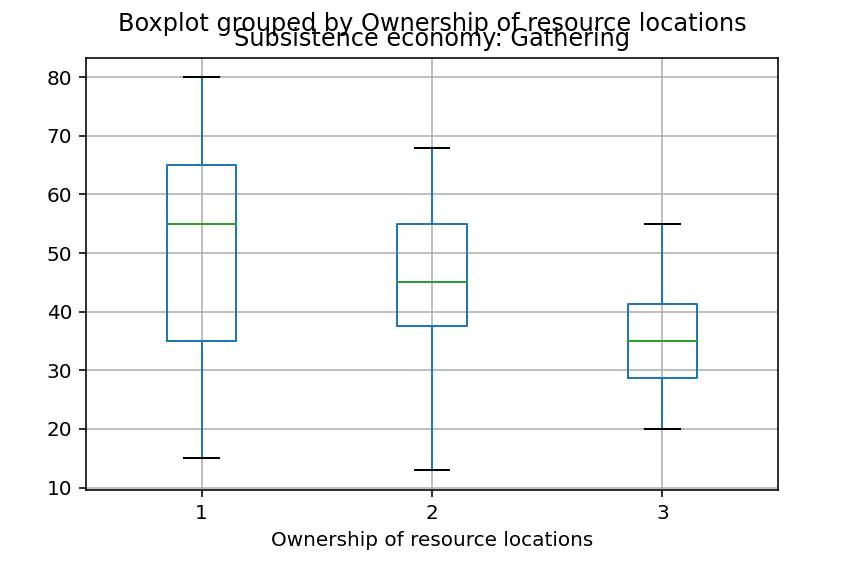

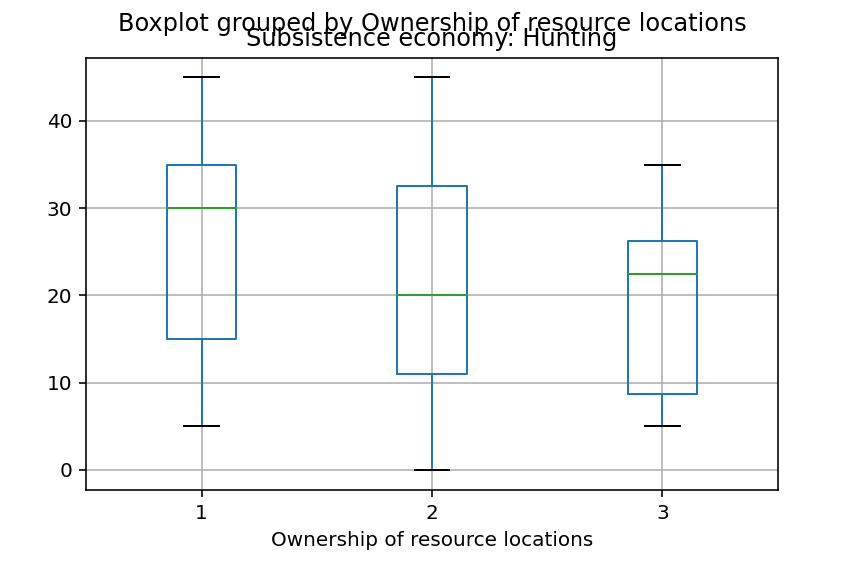

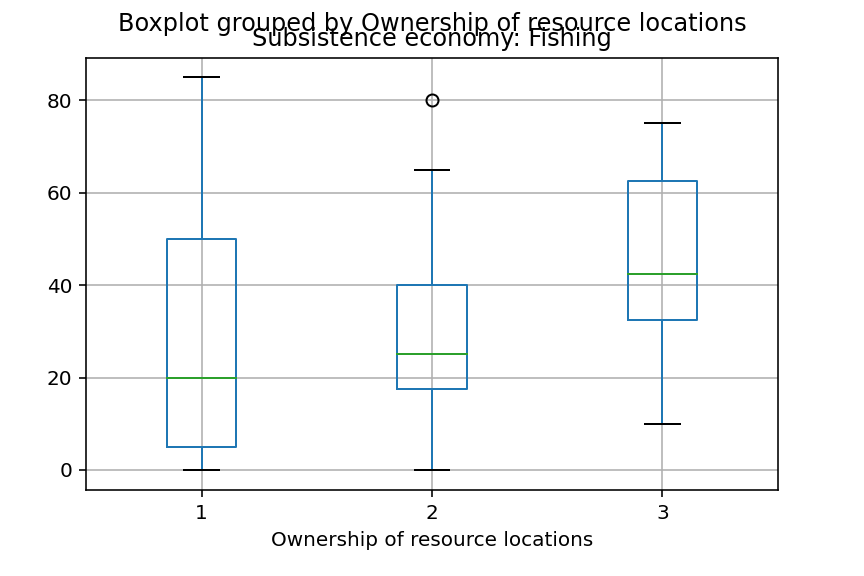

In [25]:
# boxplot of `Ownership of resource locations`),`Subsistence economy: Gathering`

d_wide.boxplot(column=['Subsistence economy: Gathering'], by='Ownership of resource locations')
d_wide.boxplot(column=['Subsistence economy: Hunting'], by='Ownership of resource locations')
d_wide.boxplot(column=['Subsistence economy: Fishing'], by='Ownership of resource locations')


Az első ábrán azt látjuk, hogy minél inkább jelen vannak a tulajdoni/használati viszonyok (x tengely), annál kevésbé jellemző a gyűjtögetés, mint fő élelemforrás. A második ábrán nem látunk összefüggést a tulajdonjog és a vadászat között. A harmadik ábrán azt látjuk, hogy minél komplexebbek a tulajdoni / használati jogok egy közösségben, annál jobban támaszkodik a közösség a halászatra, mint fő élelemforrásra.

## Tanulság

Azt a kérdést tettük föl az elején, hogy az élelemszerzés típusa meghatározza-e azt, hogy létezik-e pénz meg gazdaság egy adott gyűjtögető közösségben. Ezt a Binford Hunter-Gatherer adatbázis Ausztráliai közösségei között vizsgáltam meg.

Azt találtam, hogy a fő élelmiszerforrás (gyűjtögetés vagy halászat) összefügg azzal, hogy mennyire komplex tulajdoni / használati viszonyok vannak jelen egy közösségben. Az ilyen szempontból egyszerűbb közösségek inkább gyűjtögetnek. Az összetettebbek inkább halásznak.

A pénz jelenléte nem bizonyult jó mérőeszköznek, mert egyik, az adatbázisban szereplő Ausztrál közösség sem használ pénzt, mint csereeszközt.